In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Timestamp
from ggplot import *
import seaborn as sns
import yellowbrick

C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


# Read Data

In [2]:
sp_df = pd.read_csv("StudentsPerformance.csv")

In [3]:
sp_df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [4]:
sp_df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Data Processing

In [5]:
sp_df_dum = pd.get_dummies(sp_df, columns=['gender', 'race/ethnicity','parental level of education', 'lunch', 'test preparation course'])

In [6]:
sp_df_dum

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
5,71,83,78,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1
6,88,95,92,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
7,40,43,39,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
8,64,64,67,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
9,38,60,50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1


# Data Visualization

## ggplot - facet plot

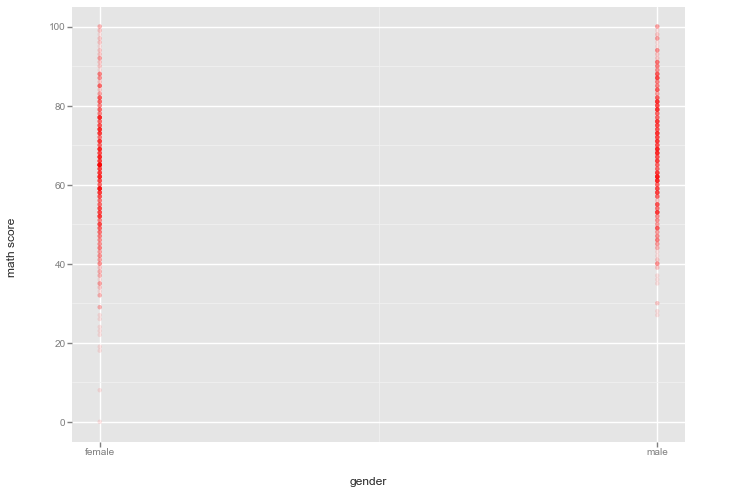

<ggplot: (-9223371960208784419)>

In [7]:
sp_plot = ggplot( aes(x = 'gender', y = 'math score'), data = sp_df)
sp_plot+geom_point(alpha = 0.1,color="red")


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

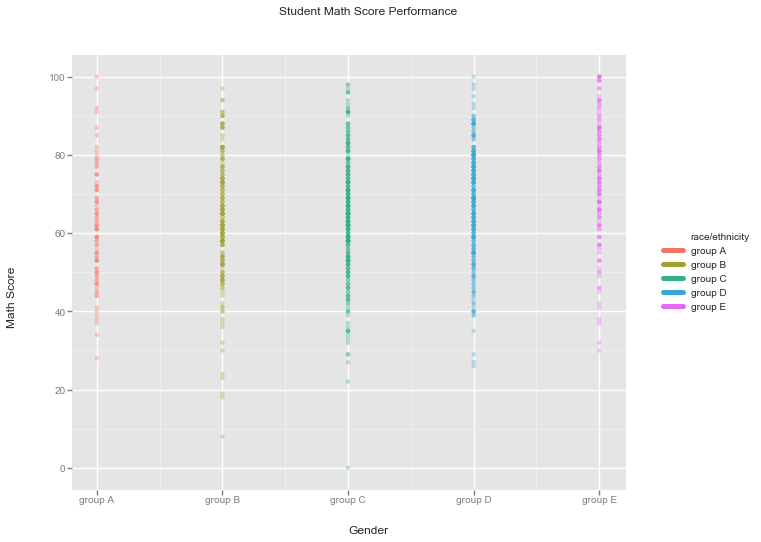

<ggplot: (76646164186)>

In [8]:
ggplot(sp_df, aes(x='race/ethnicity', y='math score', color='race/ethnicity')) +\
    geom_point(alpha = 1/3) +\
    xlab("Gender") + ylab("Math Score") + ggtitle("Student Math Score Performance")

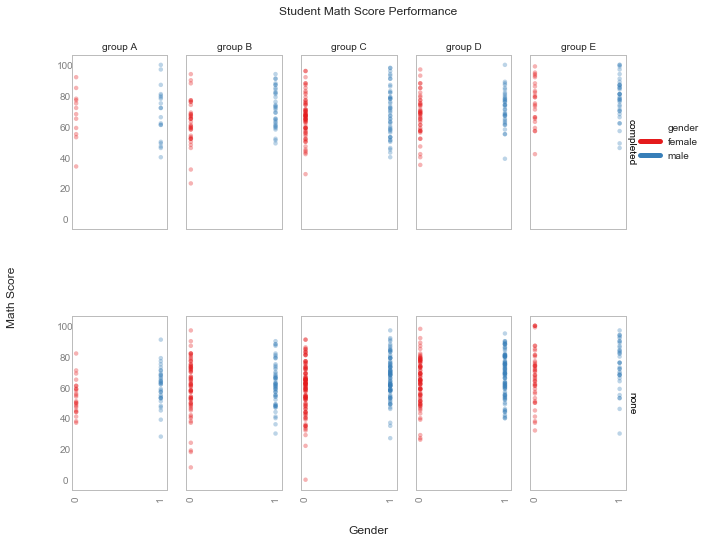

<ggplot: (76646060436)>

In [9]:
ggplot(sp_df, aes(x='gender', y='math score',color = 'gender')) +\
    geom_point(alpha = 1/3) +\
    scale_color_brewer(type='Qualitative', palette='Set1') +\
    xlab("Gender") + ylab("Math Score") + ggtitle("Student Math Score Performance")+\
    facet_grid('test preparation course','race/ethnicity', 'parental level of education') +\
    theme_bw()+\
    theme(axis_text_x = element_text(color="grey", size=10, angle=90, hjust=.5, vjust=.5), axis_text_y = element_text(color="grey", size=10))


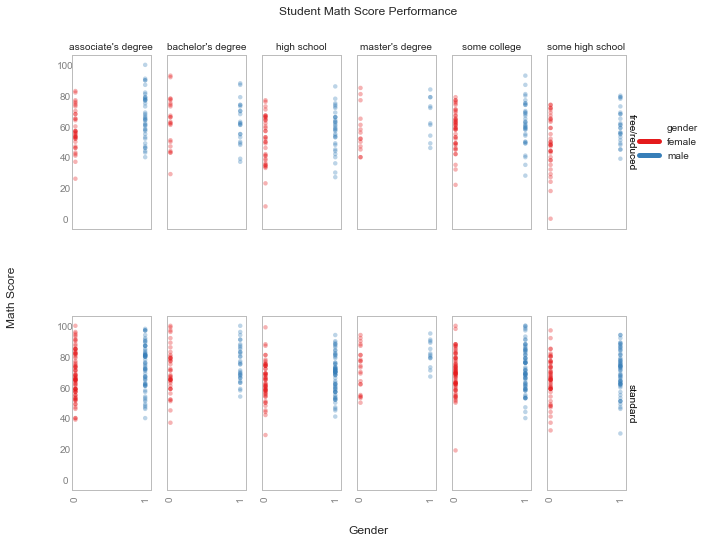

<ggplot: (-9223371960208611773)>

In [10]:
ggplot(sp_df, aes(x='gender', y='math score',color = 'gender')) +\
    geom_point(alpha = 1/3) +\
    scale_color_brewer(type='Qualitative', palette='Set1') +\
    xlab("Gender") + ylab("Math Score") + ggtitle("Student Math Score Performance")+\
    facet_grid('lunch','parental level of education') +\
    theme_bw()+\
    theme(axis_text_x = element_text(color="grey", size=10, angle=90, hjust=.5, vjust=.5), axis_text_y = element_text(color="grey", size=10))


## Seaborn Correlation Heatmap

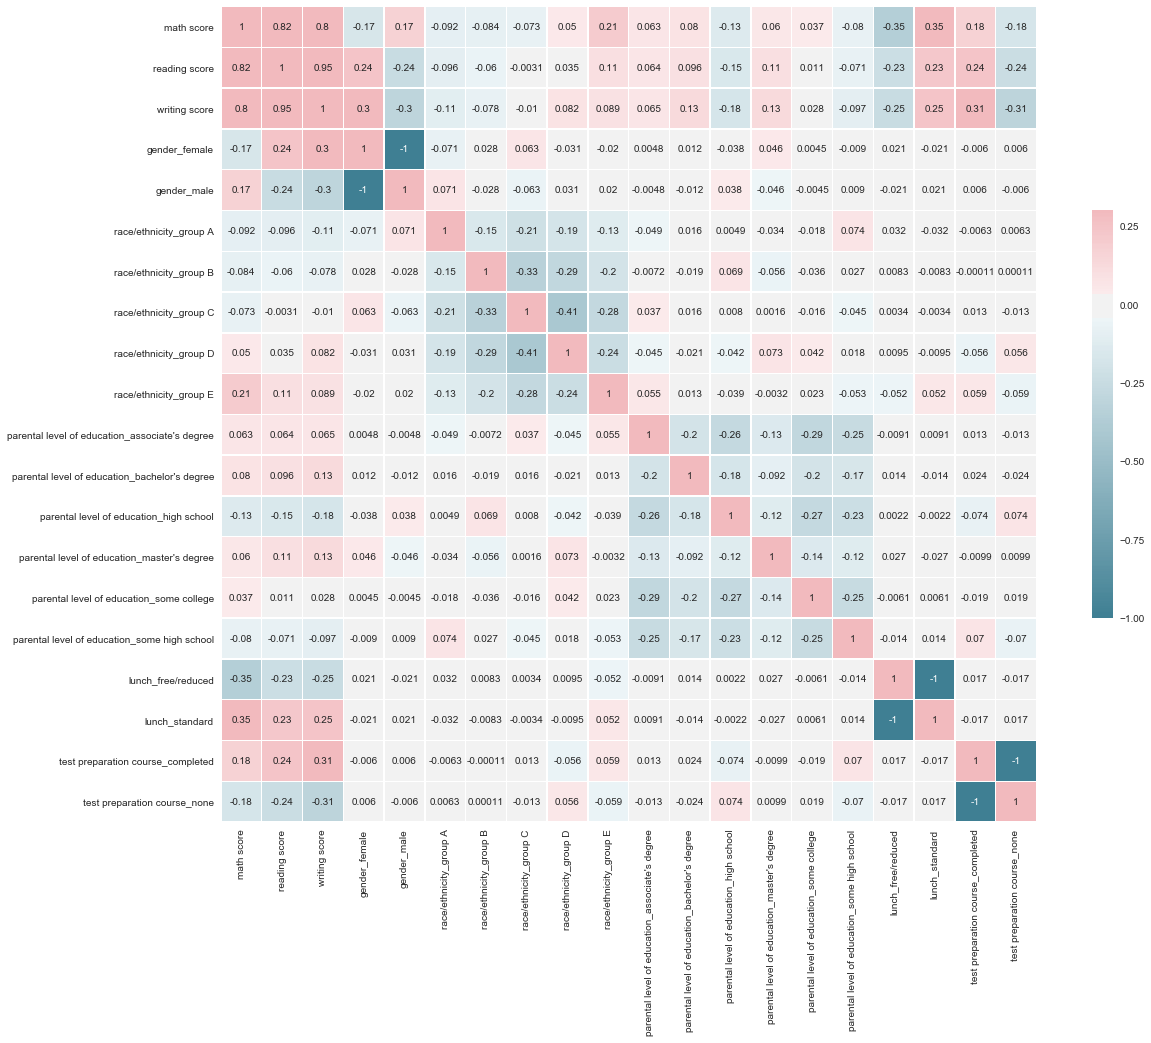

In [11]:
cor = sp_df_dum.corr()
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cor,vmax=.3, cmap=cmap,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = True)

In [12]:
sp_df_dum.columns

Index(['math score', 'reading score', 'writing score', 'gender_female',
       'gender_male', 'race/ethnicity_group A', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none'],
      dtype='object')

C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
C:\Users\cheny\Downloads\ANACONDA\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


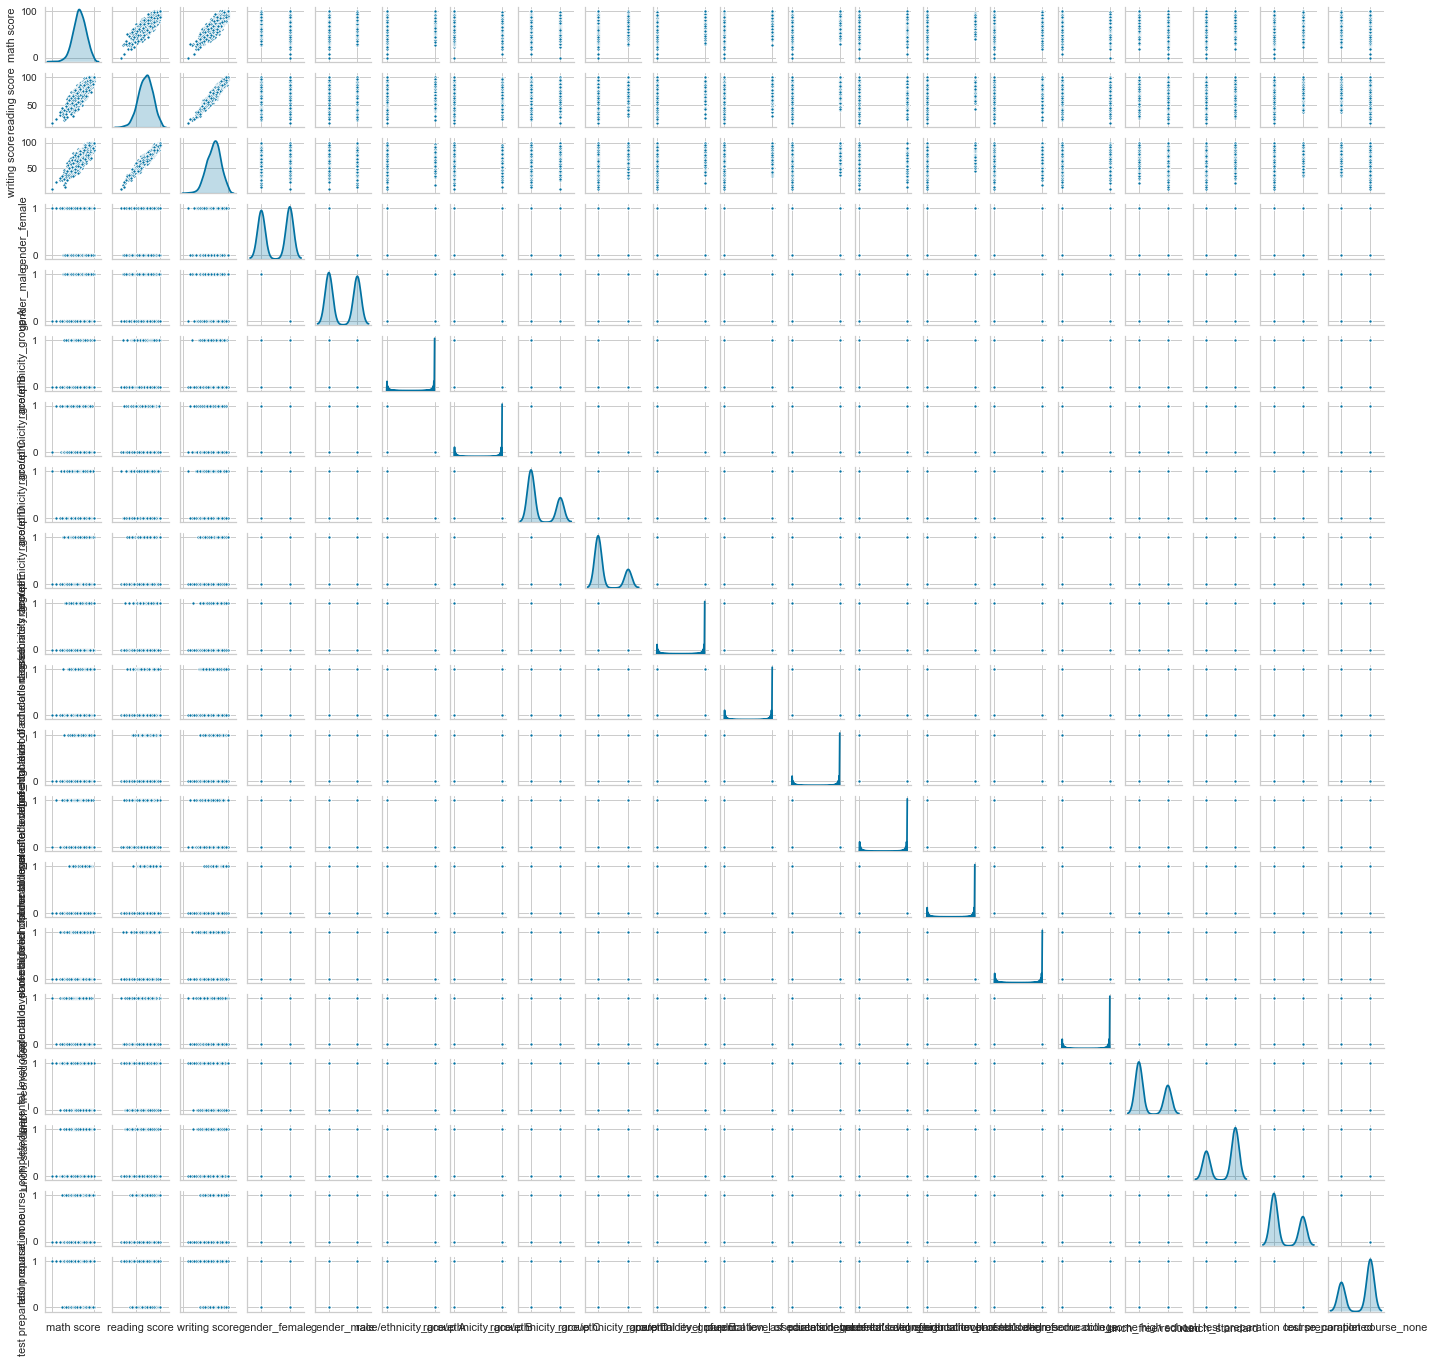

In [13]:
pp = sns.pairplot(sp_df_dum[['math score', 'reading score', 'writing score', 'gender_female',
       'gender_male', 'race/ethnicity_group A', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E',
       "parental level of education_associate's degree",
       "parental level of education_bachelor's degree",
       'parental level of education_high school',
       "parental level of education_master's degree",
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none']], palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
pp.set(xticklabels=[])

# Split Train and Test Dataset, and Apply Linear Regression Model

In [14]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [15]:
y=sp_df_dum["math score"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(sp_df_dum.iloc[:,1:], y, test_size=0.2)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [17]:
lm.coef_

array([ 0.24325602,  0.73232278, -6.62852016,  6.62852016, -1.10846384,
       -0.52699564, -1.20264982, -0.93245465,  3.77056395,  0.20103002,
       -0.71753107,  0.86413381, -1.99864686,  0.46784271,  1.18317138,
       -1.56949617,  1.56949617, -1.80861897,  1.80861897])

In [18]:
print ('Score:', model.score(X_test, y_test))

Score: 0.839984392930089


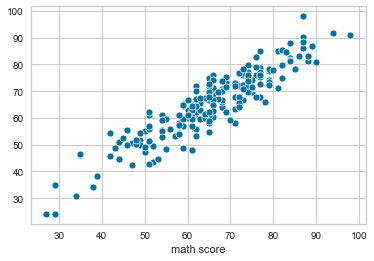

In [19]:
sns.scatterplot(y_test, predictions)

# KNN Clustering

In [20]:
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn import metrics
from scipy.spatial.distance import cdist

In [21]:
#Import Euclidean Distance Packages
from sklearn.preprocessing import normalize
from scipy.spatial.distance import pdist, squareform

In [22]:
#normalize vector for each player 
norm_df = pd.DataFrame(normalize(sp_df_dum[['math score', 'reading score', 'writing score', 'gender_female',
       'gender_male', 'race/ethnicity_group A', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E',
       "parental level of education_associate's degree",
       "parental level of education_bachelor's degree",
       'parental level of education_high school',
       "parental level of education_master's degree",
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none']] , axis=1, copy=True, return_norm=False))

In [23]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(norm_df)
kmeans_df = pd.DataFrame(kmeans.labels_)
sp_df_knn = sp_df.copy()
sp_df_knn.insert((sp_df_knn.shape[1]),'kmeans',kmeans_df)

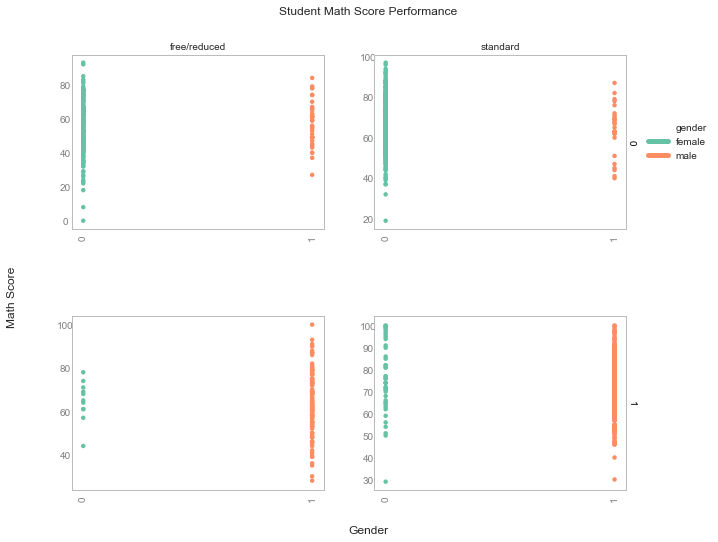

<ggplot: (76663464410)>

In [24]:
ggplot(sp_df_knn, aes(x='gender', y='math score',color='gender')) +\
    geom_point() +\
    scale_color_brewer(type='Qualitative', palette='Set2') +\
    xlab("Gender") + ylab("Math Score") + ggtitle("Student Math Score Performance")+facet_grid('kmeans','lunch',scales = 'free') +\
    theme_bw()+\
    theme(axis_text_x = element_text(color="grey", size=10, angle=90, hjust=.5, vjust=.5), axis_text_y = element_text(color="grey", size=10))
